# Facial Emotion Detection <a class="anchor" id="title"></a>

## Context

Deep Learning has found applications in many predictive tasks relating to more unstructured forms of data over the last few years, such as images, text, audio and  video. Many of these tasks seem to be in the vein of a larger direction of predictive modeling that aims tomatch human-level performance on such tasks, because humans have evolved to specialize in performing intelligent actions on such unstructured data. As a specific branch of AI(also called Affective Computing or Emotion AI) Artificial Emotional Intelligence stands for the study and development of technologies and computers that can read human emotions by means of analyzing body gestures, facial expressions, voice tone, etc. and react appropriately to them. 

In the field of human-machine interaction, facial expression recognition is critical. From recent research, it has been found that as much as 55% of communication of sentiment takes place through facial expressions and other visual cues. Therefore, training a model to identify facial emotions accurately is an important step towards the development of emotionally intelligent behavior in machines with AI capabilities. Automatic facial expression recognition systems could have many applications, including but not limited to any use case that requires human behavior understanding, detection of mental disorders, and creating a higher quality of virtual assistant for customer-facing businesses. 

## Objective

The goal of this project is to use Deep Learning and Artificial Intelligence techniques to create a computer vision model that can accurately detect facial emotions. The model should be able to perform multi-class classification on images of facial expressions, to classify the expressions according to the associated emotion. 


## About the Dataset

The data set consists of 3 folders: <strong>'test'</strong>, <strong>'train'</strong>, and <strong>'validation'</strong>.

Each of these folders four subfolders:</br>
>    - <strong>'happy':</strong> Images of people who have happy faciel expressions.<br>
>    - <strong>'sad':</strong> Images of people with sad or upset faciel expressions.<br>
>    - <strong>'surprise':</strong> Images of people who have shocked or surprised facial expressions.<br>
>    - <strong>'neutral':</strong> Images of people showing no prominent emotion in their faciel expression at all.

## Key Questions

Going into this project we need to assess and learn things about both machines and human beings:

> - Do all humans express motional reactions the same?
> - Are there any features that best define the physical states of being 'Happy', 'Sad', 'Surprised', or 'Neutral'?

Based on these answers can we determine:
> - Can an algorithm accruately and sufficiently evaluate facial emotional responses?
> - If so, how accurate can the machine get, even if the provided data is not of the highest quality?

## Table of Contents <a class="anchor" id="toc"></a>

* [Title](#title)

* Data Exploration
 -   [Visualizing the Classes](#visualize)
 -   [Distribution of Classes](#distribution)

* Basic Models
 -   [Base Model 1](#base1)
 -    [Base Model 2](#base2)
 -   [Proposed Approach](#proposed)

* Transfer Learning Approaches
 - [VGG16 Model](#vgg16)
 - [ResNet V2 Model](#resnet)
 - [EfficientnetNet Model](#efficientnet)

* Advanced Models
 - [Final Model](#advanced1)

* [Conclusion & Final Thoughts](#conclusion)
    
    

In [1]:
#Importing TensorFlow and verifying GPU response

import tensorflow as tf
print(tf.reduce_sum(tf.random.normal([1000, 1000])))
print(tf.config.list_physical_devices('GPU'))

tf.Tensor(-381.70877, shape=(), dtype=float32)
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
# Importing base MachineLearning Libraries

import zipfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

## Loading the Data

In [3]:
# Storing the path of the data file from the Google drive
path = 'Facial_emotion_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [4]:
picture_size = 48
folder_path = "Facial_emotion_images/"

## Visualizing the Classes <a class="anchor" id="visualize"></a>

### Happy

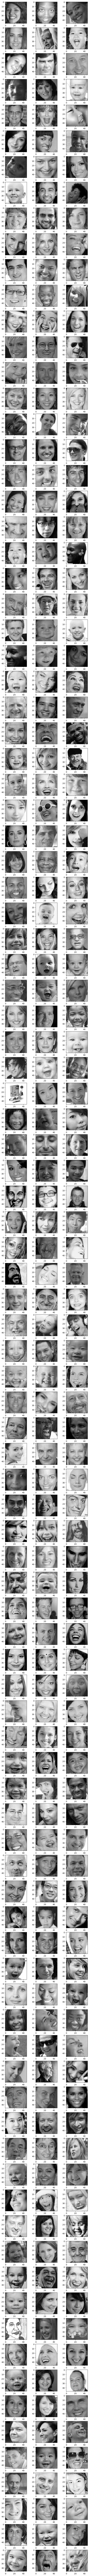

In [66]:
expression = 'happy'

plt.figure(figsize= (8,240))
for i in range(1, 301, 1):
    plt.subplot(100, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

**Observations and Insights:**
- In most situations 'happy' faces have some unique key features.
    - Lips are upturned, or mouth is open
    - Teeth are showing adding an extra contrast element from skin to lip to teeth, to lip to skin
    - Eyebrows cause a noticeable arching motion.
    - The mouth, being open as well, also makes for a more dominate feature on the face.
    - Eyes are fully open
    - Skin is tugged on leave high contrast laugh lines.
    
- Not all people convey "happiness" the same, in the sense of bottom middle, the features of his face does not match those of the the rest of the cohort,
- Outliers such as that individual will likely be seens across all categories, limiting the accuracy potential of our algorithms


### Sad

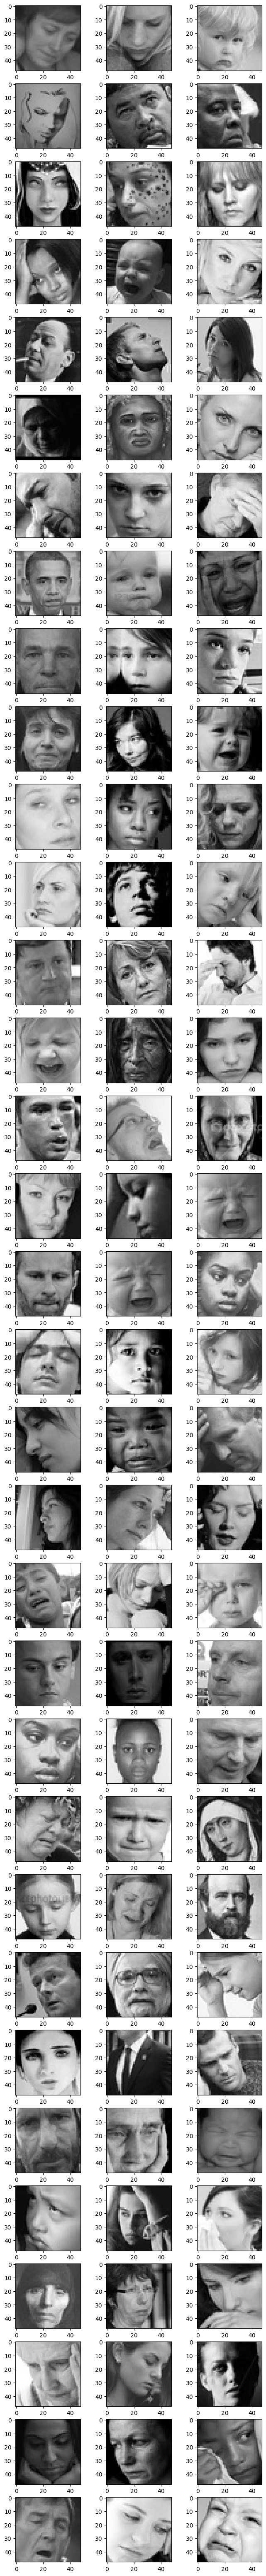

In [62]:
expression = 'sad'

plt.figure(figsize= (8,80))
for i in range(1, 100, 1):
    plt.subplot(33, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

**Observations and Insights:**
- Sad faces have some uniquely different features from our 'happy' catalogue
    - Eyes are often down or to the side, minimizing the size of the eye
    - The mouths are closed, and turned downward
    - this effect almost seems to lengthen the face
    
- As seen previously we can see that the emotion has a few very key features
- We can also notice that the "style" of photo is not homogenous
    - All the photos are in B&W, however: 
    - some are higher contrast
    - some are more middle grey
    - some are very detailed, others the photos are blown out erasing detail
    - These affects will also likely affect the machines ability to adequately assess the photo

### Neutral

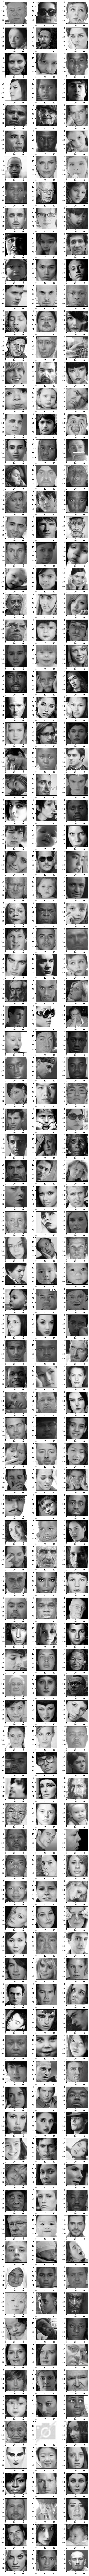

In [65]:
expression = 'neutral'

plt.figure(figsize= (8,240))
for i in range(1, 301, 1):
    plt.subplot(100, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

**Observations and Insights:**
- Neutral photos will likely be the most difficult to most accurately assess
    - Neutral photos have som unique features, 
    - the mouth is closed, but not downturn
    - the eyes are open, but not wide
    - There is no pull on the face, leaving no severe laugh lines, and making the overal surface area more roung in appearance.
- The intensity/uniqueness of these features however are not as extreme as Happy sad and surprised.
- Some faces look very similar to happy or sad; we will likely see a lot of miscalculation between this and those two categories.

### Surprised

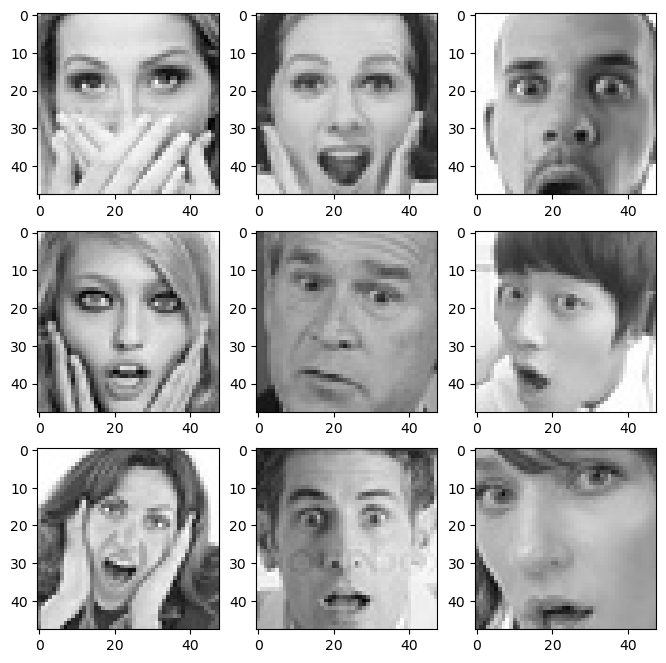

In [8]:
expression = 'surprise'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

**Observations and Insights:**
- Surprised has the most unique standout features of the 4 categories
    - Eyes are very wide
    - Eyebrows are very arched
    - Mouth is usually open in a Oval/Circular shape
    - The combination of these features brings all of the mainfacial features into a "T" shape
    
- Surprised also has the most variety which could be a challenge;
    - Many have hands, many dont, some have mouth covered, some dont, 
- Regardless when we analyze the training vs test data likely Surprised will have the highest accuracy

## Checking Distribution of Classes <a class="anchor" id="distribution"></a>

In [9]:
# Getting count of images in each folder within our training path
num_happy = len(os.listdir(folder_path + "train/happy"))
num_sad = len(os.listdir(folder_path + "train/sad"))
num_neutral = len(os.listdir(folder_path + "train/neutral"))
num_surprise = len(os.listdir(folder_path + "train/surprise"))
total = num_happy + num_sad + num_neutral + num_surprise

print("\n \033[1m Number of total images in class / % of Total images class makes up \033[0m \n")

print("       Number of images in the class 'happy':   ", num_happy)
print("        % of TTL images in the class 'happy':   ",str(round(num_happy / total * 100,2))+"% \n", "-" * 60)


print("         Number of images in the class 'sad':   ", num_sad)
print("          % of TTL images in the class 'sad':   ",str(round(num_sad / total * 100,2))+"% \n", "-" * 60)


print("     Number of images in the class 'neutral':   ", num_neutral)
print("      % of TTL images in the class 'neutral':   ",str(round(num_neutral / total * 100,2))+"% \n", "-" * 60)


print("    Number of images in the class 'surprise':   ", num_surprise)
print("     % of TTL images in the class 'surprise':   ",str(round(num_surprise / total * 100,2))+"% \n", "-" * 60)



  Number of total images in class / % of Total images class makes up  

       Number of images in the class 'happy':    3976
        % of TTL images in the class 'happy':    26.32% 
 ------------------------------------------------------------
         Number of images in the class 'sad':    3982
          % of TTL images in the class 'sad':    26.36% 
 ------------------------------------------------------------
     Number of images in the class 'neutral':    3978
      % of TTL images in the class 'neutral':    26.33% 
 ------------------------------------------------------------
    Number of images in the class 'surprise':    3173
     % of TTL images in the class 'surprise':    21.0% 
 ------------------------------------------------------------


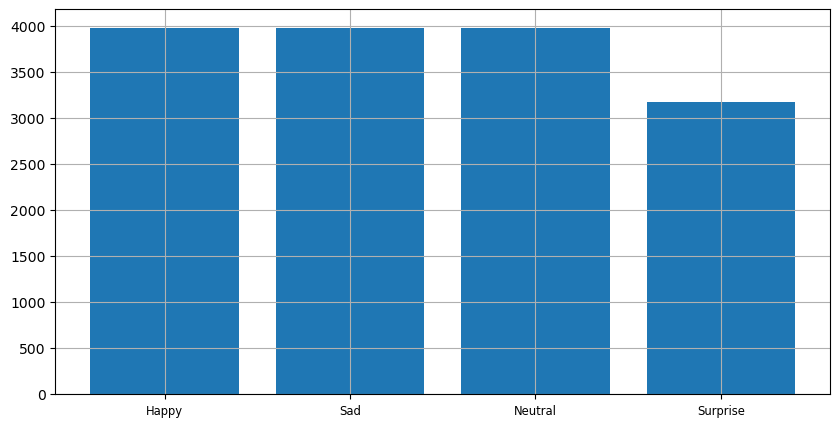

In [10]:
# Code to plot histogram
plt.figure(figsize = (10, 5))

data = {'Happy': num_happy, 'Sad': num_sad, 'Neutral': num_neutral, 'Surprise' : num_surprise}

df = pd.Series(data)

plt.bar(range(len(df)), df.values, align = 'center')

plt.xticks(range(len(df)), df.index.values, size = 'small')

plt.grid()

plt.show()

**Observations and Insights:**

- The spread of data is almost perfect for Happy/Sad/Neutral
- There are about 20% less samples for Surprised, however with 3000 sample images this should not be an issue
    - Surprise also has the most unique set of characteristics. This 20% reduction and quantity should be no concern due to quality
- The distribution of categories appear to be good.


## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. A sample of the required code has been given with respect to the training data. Please create the data loaders for validation and test set accordingly.

In [11]:
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.6,2),
                                    rescale=1./255,
                                    shear_range=0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = "grayscale" ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)


datagen_validation = ImageDataGenerator(rescale=1./255)

validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = "grayscale" ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

datagen_test = ImageDataGenerator(rescale=1./255)

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode = "grayscale" ,
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)


Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


# Base Model Building 

## Base Model 1 <a class="anchor" id="base1"></a>
[Back to Top](#toc)

Our first **Base Model** will be a simple archtecture contriving of 3 convolutional blocks.

* Each will contain one Conv2D layer followed by a maxpooling layer and one Dropout layer.
> * Block 1: Conv2D layer with **64 filters** and a **kernel size of 2**, 'Same' padding and provide the **input_shape = (48, 48, 1)**, MaxPooling2D layer with **pool size = 2**, Dropout layer with a dropout ratio of 0.1.
> * Block 2: Conv2D layer with **32 filters** and a **kernel size of 2**, **'same' padding** and **'relu' activation.**, Maxpooling2D, Dropout layer with 0.1.
> * Block 3: Conv2D layer with **16 filters** and a **kernel size of 2**, **'same' padding** and **'relu' activation.**, Maxpooling2D layer, Dropout layer with 0.2.
* After adding convolutional blocks, we'll add Flatten layer.
* First Dense layer with **512 neurons** and **'relu' activation function**.
* A Dropout layer with dropout ratio of 0.4.
* Final Dense Layer with 4 neurons and **'softmax' activation function**

In [12]:
# Initializing a Sequential Model
model1 = Sequential()

# Add the first Convolutional block
model1.add(Conv2D(64, (2,2), padding="same", input_shape=(48,48,1), activation="relu"))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.1))

# Add the second Convolutional block
model1.add(Conv2D(32, (2,2), padding="same", activation="relu"))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.1))


# Add the third Convolutional block
model1.add(Conv2D(16, (2,2), padding="same", activation="relu"))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.2))

# Add the Flatten layer
model1.add(Flatten())

# Add the first Dense layer
model1.add(Dense(512, activation="relu"))
model1.add(Dropout(0.2))

# Add the Final layer
model1.add(Dense(4, activation="softmax"))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 32)        0

### Compiling and Training the Model

In [13]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model1.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [14]:
# Our code will use categorical crossentropy as our loss function, Adam Optimizer with 0.001 learning rate, and metrics set to 'accuracy'. 
model1.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics = ['accuracy'])

In [15]:
# As a test run we will set to the epochs to 20
history1 = model1.fit(x=train_set, validation_data=validation_set, epochs=20)

Epoch 1/20
473/473 [==============================] - 56s 110ms/step - loss: 1.2989 - accuracy: 0.3726 - val_loss: 1.1646 - val_accuracy: 0.5031
Epoch 2/20
473/473 [==============================] - 8s 17ms/step - loss: 1.1588 - accuracy: 0.4879 - val_loss: 1.0652 - val_accuracy: 0.5554
Epoch 3/20
473/473 [==============================] - 8s 17ms/step - loss: 1.0822 - accuracy: 0.5292 - val_loss: 0.9561 - val_accuracy: 0.5927
Epoch 4/20
473/473 [==============================] - 8s 18ms/step - loss: 1.0197 - accuracy: 0.5581 - val_loss: 0.9343 - val_accuracy: 0.6050
Epoch 5/20
473/473 [==============================] - 9s 18ms/step - loss: 0.9757 - accuracy: 0.5844 - val_loss: 0.8941 - val_accuracy: 0.6341
Epoch 6/20
473/473 [==============================] - 8s 18ms/step - loss: 0.9510 - accuracy: 0.5913 - val_loss: 0.8773 - val_accuracy: 0.6307
Epoch 7/20
473/473 [==============================] - 9s 18ms/step - loss: 0.9204 - accuracy: 0.6055 - val_loss: 0.8384 - val_accuracy: 0.65

### Evaluating the model on the Validation Set

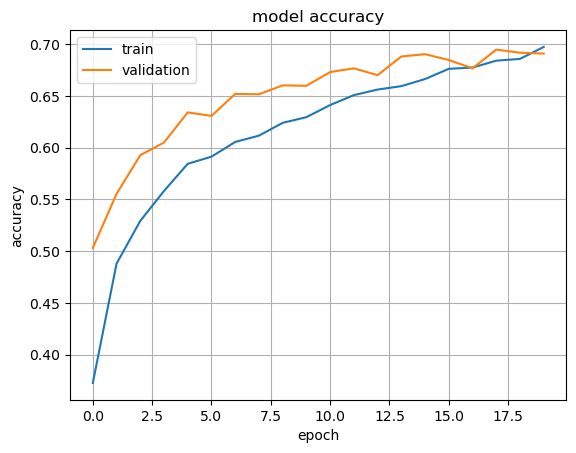

In [16]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.grid()
plt.show()

### Plotting the Confusion Matrix for Base Model 1

Found 128 images belonging to 4 classes.
4/4 [==============================] - 0s 3ms/step
4/4 - 0s - loss: 0.9944 - accuracy: 0.5547 - 31ms/epoch - 8ms/step
[0.9943549633026123, 0.5546875]


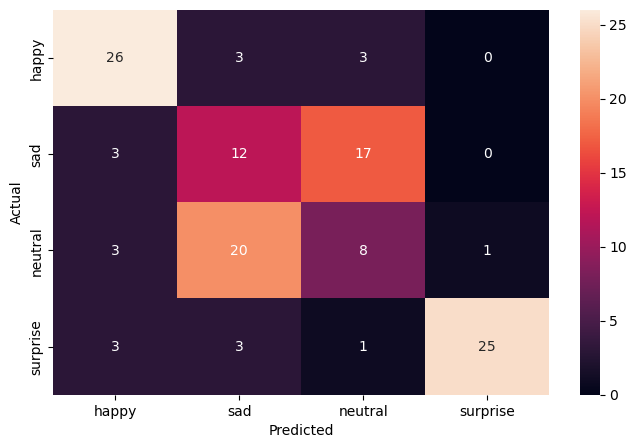

In [17]:
# Plot the confusion matrix and generate a classification report for the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
test_set = datagen_test.flow_from_directory(folder_path + "test",
                                                              target_size = (img_size,img_size),
                                                              color_mode = 'grayscale',
                                                              batch_size = 128,
                                                              class_mode = 'categorical',
                                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                                              shuffle = True) 
test_images, test_labels = next(test_set)

# Write the name of your chosen model in the blank
pred = model1.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(model1.evaluate(test_images, test_labels, verbose=2))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral', 'surprise'], yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations and Insights:**

- Pros of this model:
    - The model is not overfitting
    - Both the Training and validation data are gradually improving over time


- Cons of this model:
    - The accuracy peaks at 53%
    - At just under 2/3rds accurate I would not feel comfortable with using this model as a final product


- This model has a solid structure, later we will tweak parameters to see if we can get a higher validation accuracy
- If we expand the epochs we could likely gain another 5 - 10% accuracy with this model

## Base Model 2 <a class="anchor" id="base2"></a>

 [Back to Top](#toc)

For our second base model we will add a bit more complexity to our Convolutional blocks.

* This time, each Convolutional block will have 1 Conv2D layer, followed by a BatchNormalization, LeakuRelU, and a MaxPooling2D layer. We are not adding any Dropout layer this time.

> * Block 1: Conv2D layer with **256 filters**, **kernel size of 2**, **'same' padding** and **input_shape = (48, 48, 1)**. a BatchNormalization layer, a LeakyRelU layer parameter of **0.1**, and  MaxPooling2D layer with **pool size = 2**
> * Block 2: Conv2D layer with **128 filters** with a **kernel size of 2**, **'same' padding**, and **'relu' activation**. A BatchNormalization layer, a LeakyRelU layer parameter of **0.1**, and MaxPooling2D layer with **pool size = 2**
> * Block 3: Conv2D layer with **64 filters** with a **kernel size of 2**, **'same' padding**, and **'relu' activation**. A BatchNormalization layer, a LeakyRelU layer parameter of **0.1**, and MaxPooling2D layer with **pool size = 2**
> * Block 4: Conv2D layer with **32 filters** with a **kernel size of 2**, **'same' padding**, and **'relu' activation**. A BatchNormalization layer, a LeakyRelU layer parameter of **0.1**, and MaxPooling2D layer with **pool size = 2**

* After adding convolutional blocks, we'll add our Flatten layer.
* First Dense layer with **512 neurons** and **'relu' activation**.
* Second Dense Layer with **128 neurons** and **'relu' activation**.
* Final Dense Layer with **4 neurons** and **'softmax' activation**.


In [18]:
# Creating sequential model
model2 = Sequential()
 
# Add the first Convolutional block
model2.add(Conv2D(256, (2,2), padding="same", activation="relu", input_shape=(48,48,1)))
model2.add(BatchNormalization())
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(pool_size=(2,2)))

# Add the second Convolutional block
model2.add(Conv2D(128, (2,2), padding="same", activation="relu"))
model2.add(BatchNormalization())
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(pool_size=(2,2)))

# Add the third Convolutional block
model2.add(Conv2D(64, (2,2), padding="same", activation="relu"))
model2.add(BatchNormalization())
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(pool_size=(2,2)))

# Add the fourth Convolutional block
model2.add(Conv2D(32, (2,2), padding="same", activation="relu"))
model2.add(BatchNormalization())
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(pool_size=(2,2)))

# Add the Flatten layer
model2.add(Flatten())

# Adding the Dense layers
model2.add(Dense(512, activation="relu"))
model2.add(Dense(128, activation="relu"))
model2.add(Dense(4, activation="softmax"))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 256)       1280      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 256)      1024      
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 256)       0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 256)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 128)       131200    
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 128)     

### Compiling and Training the Model

In [19]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model2.h5", monitor='val_loss', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [20]:
# Our code will use categorical crossentropy as our loss function, Adam Optimizer with 0.001 learning rate, and metrics set to 'accuracy'. 
model2.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics = ['accuracy'])

In [21]:
# As a test run we will set to the epochs to 20
history2 = model2.fit(x=train_set, validation_data=validation_set, epochs=20)

Epoch 1/20
473/473 [==============================] - 11s 21ms/step - loss: 1.1876 - accuracy: 0.4581 - val_loss: 1.3429 - val_accuracy: 0.2463
Epoch 2/20
473/473 [==============================] - 10s 21ms/step - loss: 0.9625 - accuracy: 0.5851 - val_loss: 0.8943 - val_accuracy: 0.6178
Epoch 3/20
473/473 [==============================] - 10s 21ms/step - loss: 0.8656 - accuracy: 0.6299 - val_loss: 1.1595 - val_accuracy: 0.4591
Epoch 4/20
473/473 [==============================] - 10s 21ms/step - loss: 0.8157 - accuracy: 0.6533 - val_loss: 0.8205 - val_accuracy: 0.6719
Epoch 5/20
473/473 [==============================] - 10s 21ms/step - loss: 0.7723 - accuracy: 0.6781 - val_loss: 0.8722 - val_accuracy: 0.6379
Epoch 6/20
473/473 [==============================] - 10s 21ms/step - loss: 0.7379 - accuracy: 0.6944 - val_loss: 0.8532 - val_accuracy: 0.6430
Epoch 7/20
473/473 [==============================] - 10s 21ms/step - loss: 0.7181 - accuracy: 0.7014 - val_loss: 0.8378 - val_accuracy:

### Evaluating the Model on the Validation Set

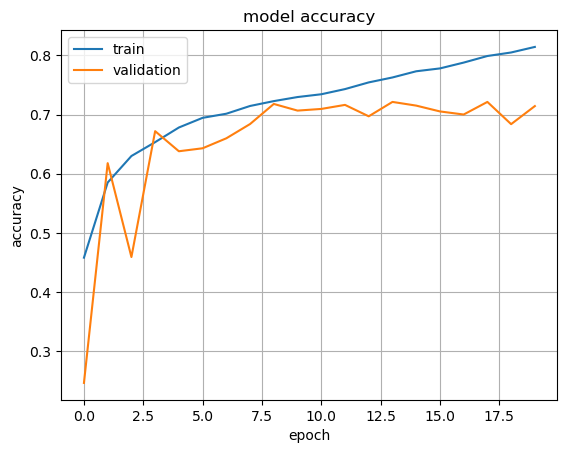

In [22]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid()
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

### Plotting the Confusion Matrix for Base Model 2

Found 128 images belonging to 4 classes.
4/4 [==============================] - 0s 5ms/step
4/4 - 0s - loss: 1.4092 - accuracy: 0.5547 - 41ms/epoch - 10ms/step
[1.4092068672180176, 0.5546875]


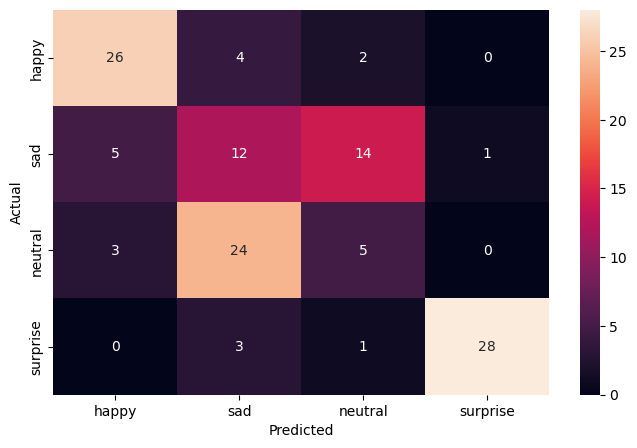

In [23]:
# Plot the confusion matrix and generate a classification report for the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
test_set = datagen_test.flow_from_directory(folder_path + "test",
                                                              target_size = (img_size,img_size),
                                                              color_mode = 'grayscale',
                                                              batch_size = 128,
                                                              class_mode = 'categorical',
                                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                                              shuffle = True) 
test_images, test_labels = next(test_set)

# Write the name of your chosen model in the blank
pred = model2.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(model2.evaluate(test_images, test_labels, verbose=2))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral', 'surprise'], yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations and Insights:**

- Pros of this model:
    - Accuracy for both Train and Validation were higher
    - The model learned at a much faster rate, achieving what took the other model 20 epochs in just 4
    

- Cons of this model:
    - The model clearly began overfitting after the 10th epoch
    - although the training accuracy would dip and peak slightly higher, it's effectiveness really tops at 15 epochs
    

- This model, although overfitting very early one is the strongest of the two with the starting settings
- Similarly to the other model, later we will tweak parameters to see if we can't gain an even higher validation accuracy
- Parameter testing will be easier with the model, as we will only need to run 10 epochs during the testing of parameters


## Proposed Approach

[Back to Top](#toc)

- **Potential techniques:** Both Models have pros and cons, both work well as starter models, however the final model will like be further tweaked and need have a combination of the good from both models<br>
- **Overall solution design:** Preliminary experimentation has shown the following for both models:
    - flipping the layers on the Conv layer (least filers first, most last) greatly brings up the accuracy.
    - Reducing the Dropout rate increases the accuracy for both training and validation without affecting overfitting
    - Including the LeakyReLU layer as an activator is better for both models over standard relu alone.
  The final solution design will likely have some combination of these features and other that require additional analysis<br>
- **Measures of success:** Continual Loss, Greatest validation accuracy, and not overfitting the model, while keeping it simple enough to run quickly and smoothly are all key measures of success that I will be implimenting for my design<br>

# Testing Transfer Learning Architectures

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### Creating our Data Loaders for Transfer Learning Architectures

In [24]:
batch_size  = 64
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0.5, 2.0),
                                    rescale = 1./255,
                                    shear_range = 0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

datagen_validation = ImageDataGenerator(rescale = 1./255)

validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)


datagen_test = ImageDataGenerator(rescale = 1./255)

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)


Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## VGG 16 Model  <a class="anchor" id="vgg16"></a>
[Back to Top](#toc)

### Importing the VGG16 Architecture

In [25]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (48, 48, 3))
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

### Model Building

* In this model, we will import till the **'block5_pool'** layer of the VGG16 model. 
* Then we will add the Base Model 1 Convolution Blocks
* Then we will add a Flatten layer, which receives the output of the 'block5_pool' layer as its input.
* We will add a few Dense layers and use 'relu' activation function on them.
* You may use Dropout and BatchNormalization layers as well.
* Then we will add our last dense layer, which must have 4 neurons and a 'softmax' activation function.

In [26]:
transfer_layer = vgg.get_layer('block5_pool')
vgg.trainable = False
vgg_model = Model(vgg.input, transfer_layer.output)

# Add weighted non-trainable VGG16 model
vggmodel = Sequential()
vggmodel.add(vgg_model)

# Add Custom Convolutional blocks
vggmodel.add(Conv2D(64, (2,2), padding="same", input_shape=(48,48,1), activation="relu"))
vggmodel.add(Dropout(0.1))
vggmodel.add(Conv2D(32, (2,2), padding="same", activation="relu"))
vggmodel.add(Dropout(0.1))
vggmodel.add(Conv2D(16, (2,2), padding="same", activation="relu"))
vggmodel.add(Dropout(0.2))

# Flattenning and Fully Connected Layers
vggmodel.add(Flatten())
vggmodel.add(Dense(256, activation = 'relu'))
vggmodel.add(Dense(128, activation = 'relu'))
vggmodel.add(Dropout(0.3))
vggmodel.add(Dense(64,  activation = 'relu'))
vggmodel.add(BatchNormalization())
vggmodel.add(Dense(4, activation='softmax'))

vggmodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 conv2d_7 (Conv2D)           (None, 1, 1, 64)          131136    
                                                                 
 dropout_4 (Dropout)         (None, 1, 1, 64)          0         
                                                                 
 conv2d_8 (Conv2D)           (None, 1, 1, 32)          8224      
                                                                 
 dropout_5 (Dropout)         (None, 1, 1, 32)          0         
                                                                 
 conv2d_9 (Conv2D)           (None, 1, 1, 16)          2064      
                                                                 
 dropout_6 (Dropout)         (None, 1, 1, 16)         

### Compiling and Training the VGG16 Model

In [27]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./vggmodel.h5", monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [28]:
vggmodel.compile(loss="categorical_crossentropy", optimizer=Adam(0.001), metrics=['accuracy'])

In [29]:
vgghistory = vggmodel.fit(train_set, validation_data=validation_set, epochs=20)

Epoch 1/20
237/237 [==============================] - 14s 54ms/step - loss: 1.2783 - accuracy: 0.3819 - val_loss: 1.3234 - val_accuracy: 0.3904
Epoch 2/20
237/237 [==============================] - 12s 50ms/step - loss: 1.2103 - accuracy: 0.4470 - val_loss: 1.2256 - val_accuracy: 0.4945
Epoch 3/20
237/237 [==============================] - 12s 50ms/step - loss: 1.1779 - accuracy: 0.4743 - val_loss: 1.1394 - val_accuracy: 0.5218
Epoch 4/20
237/237 [==============================] - 12s 51ms/step - loss: 1.1592 - accuracy: 0.4880 - val_loss: 1.1413 - val_accuracy: 0.4907
Epoch 5/20
237/237 [==============================] - 12s 50ms/step - loss: 1.1444 - accuracy: 0.4987 - val_loss: 1.0988 - val_accuracy: 0.5264
Epoch 6/20
237/237 [==============================] - 12s 51ms/step - loss: 1.1374 - accuracy: 0.5025 - val_loss: 1.1151 - val_accuracy: 0.5228
Epoch 7/20
237/237 [==============================] - 12s 50ms/step - loss: 1.1330 - accuracy: 0.5086 - val_loss: 1.0823 - val_accuracy:

### Evaluating the VGG16 Model

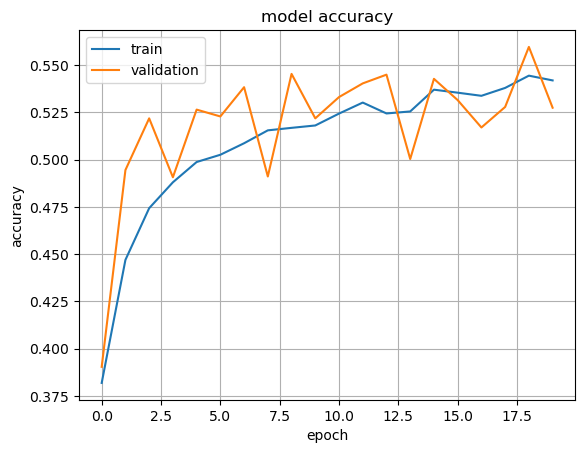

In [30]:
plt.plot(vgghistory.history['accuracy'])
plt.plot(vgghistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid()
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

**Observations and Insights:**
- The VGG Model with some modificiation did reasonably well, but still worse than the original base models
- The model however does not seem specific enough for our needs
- Likely the model was not trained on such specific emotional detection

## ResNet V2 Model <a class="anchor" id="resnet"></a>
[Back to Top](#toc)

In [31]:
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model

Resnet = ap.ResNet101(include_top = False, weights = "imagenet", input_shape=(48,48,3))
Resnet.summary()

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 54, 54, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 24, 24, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 24, 24, 64)   256         ['conv1_conv[0][0]']             
                                                                                          

                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 12, 12, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 12, 12, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 12, 12, 256)  16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_block3_3_bn (BatchNormal  (None, 12, 12, 256)  1024       ['conv2_block3_3_conv[0][0]']    
 ization) 

                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 6, 6, 128)   512         ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 6, 6, 128)   0           ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 6, 6, 512)    66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_block3_3_bn (BatchNormal  (None, 6, 6, 512)   2048        ['conv3_block3_3_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 3, 3, 256)   1024        ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 3, 3, 256)   0           ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, 3, 3, 1024)   263168      ['conv4_block2_2_relu[0][0]']    
                                                                                                  
 conv4_block2_3_bn (BatchNormal  (None, 3, 3, 1024)  4096        ['conv4_block2_3_conv[0][0]']    
 ization) 

 n)                                                                                               
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, 3, 3, 1024)   263168      ['conv4_block5_2_relu[0][0]']    
                                                                                                  
 conv4_block5_3_bn (BatchNormal  (None, 3, 3, 1024)  4096        ['conv4_block5_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_add (Add)         (None, 3, 3, 1024)   0           ['conv4_block4_out[0][0]',       
                                                                  'conv4_block5_3_bn[0][0]']      
                                                                                                  
 conv4_blo

 ization)                                                                                         
                                                                                                  
 conv4_block8_add (Add)         (None, 3, 3, 1024)   0           ['conv4_block7_out[0][0]',       
                                                                  'conv4_block8_3_bn[0][0]']      
                                                                                                  
 conv4_block8_out (Activation)  (None, 3, 3, 1024)   0           ['conv4_block8_add[0][0]']       
                                                                                                  
 conv4_block9_1_conv (Conv2D)   (None, 3, 3, 256)    262400      ['conv4_block8_out[0][0]']       
                                                                                                  
 conv4_block9_1_bn (BatchNormal  (None, 3, 3, 256)   1024        ['conv4_block9_1_conv[0][0]']    
 ization) 

 conv4_block11_out (Activation)  (None, 3, 3, 1024)  0           ['conv4_block11_add[0][0]']      
                                                                                                  
 conv4_block12_1_conv (Conv2D)  (None, 3, 3, 256)    262400      ['conv4_block11_out[0][0]']      
                                                                                                  
 conv4_block12_1_bn (BatchNorma  (None, 3, 3, 256)   1024        ['conv4_block12_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block12_1_relu (Activati  (None, 3, 3, 256)   0           ['conv4_block12_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_blo

 lization)                                                                                        
                                                                                                  
 conv4_block15_1_relu (Activati  (None, 3, 3, 256)   0           ['conv4_block15_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block15_2_conv (Conv2D)  (None, 3, 3, 256)    590080      ['conv4_block15_1_relu[0][0]']   
                                                                                                  
 conv4_block15_2_bn (BatchNorma  (None, 3, 3, 256)   1024        ['conv4_block15_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_blo

 conv4_block18_2_conv (Conv2D)  (None, 3, 3, 256)    590080      ['conv4_block18_1_relu[0][0]']   
                                                                                                  
 conv4_block18_2_bn (BatchNorma  (None, 3, 3, 256)   1024        ['conv4_block18_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block18_2_relu (Activati  (None, 3, 3, 256)   0           ['conv4_block18_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block18_3_conv (Conv2D)  (None, 3, 3, 1024)   263168      ['conv4_block18_2_relu[0][0]']   
                                                                                                  
 conv4_blo

 conv4_block21_2_relu (Activati  (None, 3, 3, 256)   0           ['conv4_block21_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block21_3_conv (Conv2D)  (None, 3, 3, 1024)   263168      ['conv4_block21_2_relu[0][0]']   
                                                                                                  
 conv4_block21_3_bn (BatchNorma  (None, 3, 3, 1024)  4096        ['conv4_block21_3_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block21_add (Add)        (None, 3, 3, 1024)   0           ['conv4_block20_out[0][0]',      
                                                                  'conv4_block21_3_bn[0][0]']     
          

 conv5_block1_3_conv (Conv2D)   (None, 2, 2, 2048)   1050624     ['conv5_block1_2_relu[0][0]']    
                                                                                                  
 conv5_block1_0_bn (BatchNormal  (None, 2, 2, 2048)  8192        ['conv5_block1_0_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block1_3_bn (BatchNormal  (None, 2, 2, 2048)  8192        ['conv5_block1_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block1_add (Add)         (None, 2, 2, 2048)   0           ['conv5_block1_0_bn[0][0]',      
                                                                  'conv5_block1_3_bn[0][0]']      
          

### Model Building <a class="anchor" id="resnet"></a>

* In this model, we will import till the **'conv5_block3_add'** layer of the ResNet model. 
* Then we will add the Base Model 1 Convolution Blocks
* Then we will add a Flatten layer, which receives the output of the 'conv5_block3_add' layer as its input.
* We will add a few Dense layers and use 'relu' activation function on them.
* You may use Dropout and BatchNormalization layers as well.
* Then we will add our last dense layer, which must have 4 neurons and a 'softmax' activation function.

In [32]:
transfer_layer_Resnet = Resnet.get_layer('conv5_block3_add')
Resnet.trainable = False
resnetmodel = Model(Resnet.input, transfer_layer_Resnet.output)

# Add weighted non-trainable Resnet Model
resmodel = Sequential()
resmodel.add(resnetmodel)

# Custom Convolutional blocks
resmodel.add(Conv2D(64, (2,2), padding="same", input_shape=(48,48,1), activation="relu"))
resmodel.add(Dropout(0.1))
resmodel.add(Conv2D(32, (2,2), padding="same", activation="relu"))
resmodel.add(Dropout(0.1))
resmodel.add(Conv2D(16, (2,2), padding="same", activation="relu"))
resmodel.add(Dropout(0.2))

# Flattenning and Fully Connected Layers
resmodel.add(Flatten())
resmodel.add(Dense(256, activation = 'relu'))
resmodel.add(Dense(128, activation = 'relu'))
resmodel.add(Dropout(0.3))
resmodel.add(Dense(64,  activation = 'relu'))
resmodel.add(BatchNormalization())
resmodel.add(Dense(4, activation='softmax'))

resmodel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_1 (Functional)        (None, 2, 2, 2048)        42658176  
                                                                 
 conv2d_10 (Conv2D)          (None, 2, 2, 64)          524352    
                                                                 
 dropout_8 (Dropout)         (None, 2, 2, 64)          0         
                                                                 
 conv2d_11 (Conv2D)          (None, 2, 2, 32)          8224      
                                                                 
 dropout_9 (Dropout)         (None, 2, 2, 32)          0         
                                                                 
 conv2d_12 (Conv2D)          (None, 2, 2, 16)          2064      
                                                                 
 dropout_10 (Dropout)        (None, 2, 2, 16)         

### Compiling and Training the Model

In [33]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./resmodel.h5", monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [34]:
resmodel.compile(loss="categorical_crossentropy", optimizer=Adam(0.001), metrics=['accuracy'])

In [35]:
reshistory = resmodel.fit(train_set, validation_data=validation_set, epochs=20)

Epoch 1/20
237/237 [==============================] - 19s 62ms/step - loss: 1.5169 - accuracy: 0.2571 - val_loss: 1.3645 - val_accuracy: 0.3667
Epoch 2/20
237/237 [==============================] - 14s 58ms/step - loss: 1.4103 - accuracy: 0.2540 - val_loss: 1.4159 - val_accuracy: 0.2289
Epoch 3/20
237/237 [==============================] - 14s 58ms/step - loss: 1.3968 - accuracy: 0.2615 - val_loss: 1.4184 - val_accuracy: 0.2289
Epoch 4/20
237/237 [==============================] - 13s 56ms/step - loss: 1.3930 - accuracy: 0.2589 - val_loss: 1.3758 - val_accuracy: 0.2443
Epoch 5/20
237/237 [==============================] - 14s 57ms/step - loss: 1.3913 - accuracy: 0.2661 - val_loss: 1.3778 - val_accuracy: 0.2289
Epoch 6/20
237/237 [==============================] - 13s 56ms/step - loss: 1.3916 - accuracy: 0.2622 - val_loss: 1.3639 - val_accuracy: 0.3667
Epoch 7/20
237/237 [==============================] - 14s 58ms/step - loss: 1.3894 - accuracy: 0.2615 - val_loss: 1.3636 - val_accuracy:

### Evaluating the ResNet Model

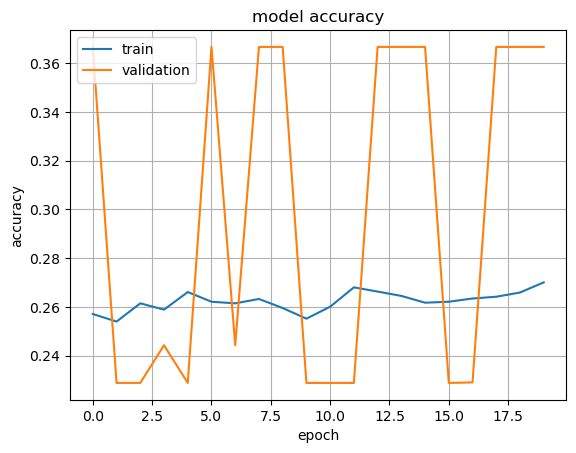

In [36]:
plt.plot(reshistory.history['accuracy'])
plt.plot(reshistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid()
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

**Observations and Insights:**
- Resnet maxed at 27% accuracy
- Although we could fine tune the model it doesn't seem worth looking into.

## EfficientNet Model <a class="anchor" id="efficientnet"></a>
[Back to Top](#toc)

In [37]:
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model
EfficientNet = ap.EfficientNetV2B2(include_top=False,weights="imagenet", input_shape= (48, 48, 3))

EfficientNet.summary()

Model: "efficientnetv2-b2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 rescaling (Rescaling)          (None, 48, 48, 3)    0           ['input_3[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 48, 48, 3)    0           ['rescaling[0][0]']              
                                                                                                  
 stem_conv (Conv2D)             (None, 24, 24, 32)   864         ['normalization[0][0]']          
                                                                                  

 block2c_project_bn (BatchNorma  (None, 12, 12, 32)  128         ['block2c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2c_drop (Dropout)         (None, 12, 12, 32)   0           ['block2c_project_bn[0][0]']     
                                                                                                  
 block2c_add (Add)              (None, 12, 12, 32)   0           ['block2c_drop[0][0]',           
                                                                  'block2b_add[0][0]']            
                                                                                                  
 block3a_expand_conv (Conv2D)   (None, 6, 6, 128)    36864       ['block2c_add[0][0]']            
                                                                                                  
 block3a_e

                                                                                                  
 block4a_se_expand (Conv2D)     (None, 1, 1, 224)    3360        ['block4a_se_reduce[0][0]']      
                                                                                                  
 block4a_se_excite (Multiply)   (None, 3, 3, 224)    0           ['block4a_activation[0][0]',     
                                                                  'block4a_se_expand[0][0]']      
                                                                                                  
 block4a_project_conv (Conv2D)  (None, 3, 3, 104)    23296       ['block4a_se_excite[0][0]']      
                                                                                                  
 block4a_project_bn (BatchNorma  (None, 3, 3, 104)   416         ['block4a_project_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 block4c_drop (Dropout)         (None, 3, 3, 104)    0           ['block4c_project_bn[0][0]']     
                                                                                                  
 block4c_add (Add)              (None, 3, 3, 104)    0           ['block4c_drop[0][0]',           
                                                                  'block4b_add[0][0]']            
                                                                                                  
 block4d_expand_conv (Conv2D)   (None, 3, 3, 416)    43264       ['block4c_add[0][0]']            
                                                                                                  
 block4d_expand_bn (BatchNormal  (None, 3, 3, 416)   1664        ['block4d_expand_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 block5b_expand_activation (Act  (None, 3, 3, 720)   0           ['block5b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block5b_dwconv2 (DepthwiseConv  (None, 3, 3, 720)   6480        ['block5b_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block5b_bn (BatchNormalization  (None, 3, 3, 720)   2880        ['block5b_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block5b_a

 2D)                                                             ']                               
                                                                                                  
 block5d_bn (BatchNormalization  (None, 3, 3, 720)   2880        ['block5d_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block5d_activation (Activation  (None, 3, 3, 720)   0           ['block5d_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5d_se_squeeze (GlobalAver  (None, 720)         0           ['block5d_activation[0][0]']     
 agePooling2D)                                                                                    
          

 block5f_activation (Activation  (None, 3, 3, 720)   0           ['block5f_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5f_se_squeeze (GlobalAver  (None, 720)         0           ['block5f_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5f_se_reshape (Reshape)   (None, 1, 1, 720)    0           ['block5f_se_squeeze[0][0]']     
                                                                                                  
 block5f_se_reduce (Conv2D)     (None, 1, 1, 30)     21630       ['block5f_se_reshape[0][0]']     
                                                                                                  
 block5f_s

 block6b_se_expand (Conv2D)     (None, 1, 1, 1248)   66144       ['block6b_se_reduce[0][0]']      
                                                                                                  
 block6b_se_excite (Multiply)   (None, 2, 2, 1248)   0           ['block6b_activation[0][0]',     
                                                                  'block6b_se_expand[0][0]']      
                                                                                                  
 block6b_project_conv (Conv2D)  (None, 2, 2, 208)    259584      ['block6b_se_excite[0][0]']      
                                                                                                  
 block6b_project_bn (BatchNorma  (None, 2, 2, 208)   832         ['block6b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6b_d

 block6d_project_conv (Conv2D)  (None, 2, 2, 208)    259584      ['block6d_se_excite[0][0]']      
                                                                                                  
 block6d_project_bn (BatchNorma  (None, 2, 2, 208)   832         ['block6d_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6d_drop (Dropout)         (None, 2, 2, 208)    0           ['block6d_project_bn[0][0]']     
                                                                                                  
 block6d_add (Add)              (None, 2, 2, 208)    0           ['block6d_drop[0][0]',           
                                                                  'block6c_add[0][0]']            
                                                                                                  
 block6e_e

 block6f_drop (Dropout)         (None, 2, 2, 208)    0           ['block6f_project_bn[0][0]']     
                                                                                                  
 block6f_add (Add)              (None, 2, 2, 208)    0           ['block6f_drop[0][0]',           
                                                                  'block6e_add[0][0]']            
                                                                                                  
 block6g_expand_conv (Conv2D)   (None, 2, 2, 1248)   259584      ['block6f_add[0][0]']            
                                                                                                  
 block6g_expand_bn (BatchNormal  (None, 2, 2, 1248)  4992        ['block6g_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6g_e

 block6i_expand_conv (Conv2D)   (None, 2, 2, 1248)   259584      ['block6h_add[0][0]']            
                                                                                                  
 block6i_expand_bn (BatchNormal  (None, 2, 2, 1248)  4992        ['block6i_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6i_expand_activation (Act  (None, 2, 2, 1248)  0           ['block6i_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6i_dwconv2 (DepthwiseConv  (None, 2, 2, 1248)  11232       ['block6i_expand_activation[0][0]
 2D)                                                             ']                               
          

                                                                                                  
Total params: 8,769,374
Trainable params: 8,687,086
Non-trainable params: 82,288
__________________________________________________________________________________________________


### Model Building

We will use the same formula as our last two tests for this last peak at transfer models

In [38]:
transfer_layer_EfficientNet = EfficientNet.get_layer('block6e_expand_activation')
EfficientNet.trainable = False
efficientnetmodel = Model(EfficientNet.input, transfer_layer_EfficientNet.output)

# Add weighted non-trainable EfficientNet Model
effmodel = Sequential()
effmodel.add(efficientnetmodel)

# Custom Convolutional blocks
effmodel.add(Conv2D(64, (2,2), padding="same", input_shape=(48,48,1), activation="relu"))
effmodel.add(Dropout(0.1))
effmodel.add(Conv2D(32, (2,2), padding="same", activation="relu"))
effmodel.add(Dropout(0.1))
effmodel.add(Conv2D(16, (2,2), padding="same", activation="relu"))
effmodel.add(Dropout(0.2))

# Flattenning and Fully Connected Layers
effmodel.add(Flatten())
effmodel.add(Dense(256, activation = 'relu'))
effmodel.add(Dense(128, activation = 'relu'))
effmodel.add(Dropout(0.3))
effmodel.add(Dense(64,  activation = 'relu'))
effmodel.add(BatchNormalization())
effmodel.add(Dense(4, activation='softmax'))

effmodel.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_2 (Functional)        (None, 2, 2, 1248)        4701606   
                                                                 
 conv2d_13 (Conv2D)          (None, 2, 2, 64)          319552    
                                                                 
 dropout_12 (Dropout)        (None, 2, 2, 64)          0         
                                                                 
 conv2d_14 (Conv2D)          (None, 2, 2, 32)          8224      
                                                                 
 dropout_13 (Dropout)        (None, 2, 2, 32)          0         
                                                                 
 conv2d_15 (Conv2D)          (None, 2, 2, 16)          2064      
                                                                 
 dropout_14 (Dropout)        (None, 2, 2, 16)         

### Compiling and Training the Model

In [39]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./effmodel.h5", monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 10

In [40]:
effmodel.compile(loss="categorical_crossentropy", optimizer=Adam(0.001), metrics=['accuracy'])

In [41]:
effhistory = effmodel.fit(train_set, validation_data=validation_set, epochs=20)

Epoch 1/20
237/237 [==============================] - 17s 56ms/step - loss: 1.4199 - accuracy: 0.2572 - val_loss: 1.3666 - val_accuracy: 0.3667
Epoch 2/20
237/237 [==============================] - 13s 53ms/step - loss: 1.3860 - accuracy: 0.2634 - val_loss: 1.3729 - val_accuracy: 0.2443
Epoch 3/20
237/237 [==============================] - 12s 52ms/step - loss: 1.3827 - accuracy: 0.2622 - val_loss: 1.3731 - val_accuracy: 0.2289
Epoch 4/20
237/237 [==============================] - 13s 53ms/step - loss: 1.3823 - accuracy: 0.2596 - val_loss: 1.3712 - val_accuracy: 0.2443
Epoch 5/20
237/237 [==============================] - 12s 53ms/step - loss: 1.3826 - accuracy: 0.2644 - val_loss: 1.3743 - val_accuracy: 0.2443
Epoch 6/20
237/237 [==============================] - 13s 53ms/step - loss: 1.3823 - accuracy: 0.2616 - val_loss: 1.3756 - val_accuracy: 0.2289
Epoch 7/20
237/237 [==============================] - 12s 52ms/step - loss: 1.3824 - accuracy: 0.2621 - val_loss: 1.3710 - val_accuracy:

### Evaluating the EfficientNet Model

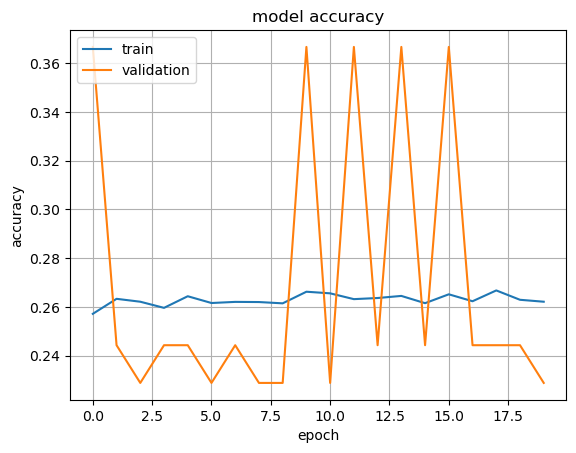

In [42]:
plt.plot(effhistory.history['accuracy'])
plt.plot(effhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid()
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

**Observations and Insights:**
- Efficcientnet also did very poorly

# Advanced Models

In this section, we will build a couple more complex Models based off our original Base Models with Modification.

### Creating Our Data Loaders

In [67]:
batch_size = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                   rotation_range = 45,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   brightness_range = [0.3,1.6],
                                   rescale = 1./255,
                                   shear_range = 0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)


datagen_validation = ImageDataGenerator(rescale = 1./255)

validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

datagen_test = ImageDataGenerator(rescale = 1./255)

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)


Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## Final Proposed Model <a class="anchor"></a>
[Back to Top](#toc)

In [69]:
highest = Sequential()

# Add 1st CNN Block
highest.add(Conv2D(128,(4,4),padding='same',
                   input_shape=(48,48,1)))
highest.add(LeakyReLU(alpha=0.2))
highest.add(Conv2D(64,(2,2),padding='same'))
highest.add(LeakyReLU(alpha=0.2))
highest.add(BatchNormalization())
highest.add(MaxPooling2D(pool_size=2))
highest.add(Dropout(0.05))

# Add 3rd CNN Block
highest.add(Conv2D(256,(4,4),padding='same'))
highest.add(LeakyReLU(alpha=0.2))
highest.add(Conv2D(128,(2,2),padding='same'))
highest.add(LeakyReLU(alpha=0.2))
highest.add(BatchNormalization())
highest.add(MaxPooling2D(pool_size=2))
highest.add(Dropout(0.1))

# Add 5th CNN Block
highest.add(Conv2D(512,(4,4),padding='same'))
highest.add(LeakyReLU(alpha=0.2))
highest.add(Conv2D(256,(2,2),padding='same'))
highest.add(LeakyReLU(alpha=0.2))
highest.add(BatchNormalization())
highest.add(MaxPooling2D(pool_size=2))
highest.add(Dropout(0.1))

# Add 7th CNN Block
highest.add(Conv2D(64,(2,2),padding='same'))
highest.add(LeakyReLU(alpha=0.2))
highest.add(BatchNormalization())
highest.add(MaxPooling2D(pool_size=2))
highest.add(Dropout(0.1))

highest.add(Flatten())

highest.add(Dense(4, activation = 'softmax'))
highest.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 48, 48, 128)       2176      
                                                                 
 leaky_re_lu_18 (LeakyReLU)  (None, 48, 48, 128)       0         
                                                                 
 conv2d_31 (Conv2D)          (None, 48, 48, 64)        32832     
                                                                 
 leaky_re_lu_19 (LeakyReLU)  (None, 48, 48, 64)        0         
                                                                 
 batch_normalization_15 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                 

In [70]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger

epochs = 25

steps_per_epoch = train_set.n//train_set.batch_size
validation_steps = validation_set.n//validation_set.batch_size

checkpoint = ModelCheckpoint("highest.h5", monitor = 'val_accuracy',
                            save_weights_only = True, model = 'max', verbose = 1)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 2, min_lr = 0.005 , model = 'auto')

callbacks = [checkpoint, reduce_lr]

In [71]:
highest.compile(loss='categorical_crossentropy', optimizer=Adam(0.0025), metrics=['accuracy'])

In [72]:
high_history = highest.fit(train_set, validation_data=validation_set, epochs=60)

Epoch 1/60
473/473 [==============================] - 85s 178ms/step - loss: 1.4659 - accuracy: 0.2737 - val_loss: 1.3096 - val_accuracy: 0.3442
Epoch 2/60
473/473 [==============================] - 21s 45ms/step - loss: 1.3579 - accuracy: 0.3348 - val_loss: 1.2669 - val_accuracy: 0.3884
Epoch 3/60
473/473 [==============================] - 20s 42ms/step - loss: 1.2753 - accuracy: 0.3959 - val_loss: 1.1962 - val_accuracy: 0.4718
Epoch 4/60
473/473 [==============================] - 22s 47ms/step - loss: 1.1829 - accuracy: 0.4544 - val_loss: 1.2944 - val_accuracy: 0.3703
Epoch 5/60
473/473 [==============================] - 20s 42ms/step - loss: 1.0947 - accuracy: 0.5121 - val_loss: 0.9269 - val_accuracy: 0.6092
Epoch 6/60
473/473 [==============================] - 18s 38ms/step - loss: 0.9969 - accuracy: 0.5665 - val_loss: 0.8414 - val_accuracy: 0.6544
Epoch 7/60
473/473 [==============================] - 18s 38ms/step - loss: 0.9279 - accuracy: 0.6077 - val_loss: 0.9142 - val_accuracy

473/473 [==============================] - 18s 38ms/step - loss: 0.5878 - accuracy: 0.7626 - val_loss: 0.7105 - val_accuracy: 0.7259
Epoch 58/60
473/473 [==============================] - 18s 38ms/step - loss: 0.5828 - accuracy: 0.7666 - val_loss: 0.5631 - val_accuracy: 0.7808
Epoch 59/60
473/473 [==============================] - 18s 38ms/step - loss: 0.5747 - accuracy: 0.7695 - val_loss: 0.6247 - val_accuracy: 0.7525
Epoch 60/60
473/473 [==============================] - 18s 38ms/step - loss: 0.5760 - accuracy: 0.7686 - val_loss: 0.5901 - val_accuracy: 0.7689


In [53]:
high_history = highest.fit(train_set, validation_data=validation_set, epochs=5)

Epoch 1/5
473/473 [==============================] - 18s 37ms/step - loss: 0.5580 - accuracy: 0.7736 - val_loss: 0.5880 - val_accuracy: 0.7848
Epoch 2/5
473/473 [==============================] - 18s 37ms/step - loss: 0.5611 - accuracy: 0.7779 - val_loss: 0.6120 - val_accuracy: 0.7643
Epoch 3/5
473/473 [==============================] - 18s 38ms/step - loss: 0.5566 - accuracy: 0.7775 - val_loss: 0.5912 - val_accuracy: 0.7752
Epoch 4/5
473/473 [==============================] - 18s 38ms/step - loss: 0.5601 - accuracy: 0.7754 - val_loss: 0.6086 - val_accuracy: 0.7728
Epoch 5/5
473/473 [==============================] - 18s 38ms/step - loss: 0.5530 - accuracy: 0.7752 - val_loss: 0.6278 - val_accuracy: 0.7774


### Evaluating the Model on the Validation Set

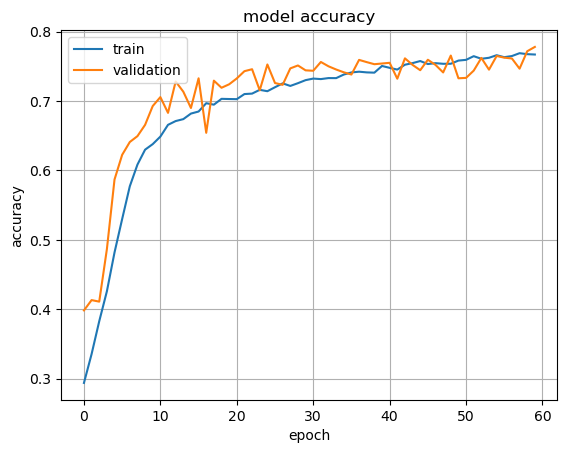

In [48]:
plt.plot(high_history.history['accuracy'])
plt.plot(high_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid()
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

### Plotting the Confusion Matrix for the chosen final model

Found 128 images belonging to 4 classes.
4/4 [==============================] - 0s 80ms/step
4/4 - 0s - loss: 0.5952 - accuracy: 0.7812 - 66ms/epoch - 16ms/step
[0.5951745510101318, 0.78125]


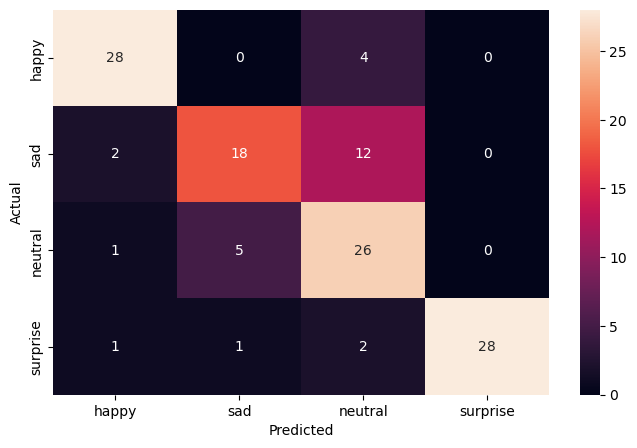

In [54]:
# Plot the confusion matrix and generate a classification report for the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
test_set = datagen_test.flow_from_directory(folder_path + "test",
                                                              target_size = (img_size,img_size),
                                                              color_mode = 'grayscale',
                                                              batch_size = 128,
                                                              class_mode = 'categorical',
                                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                                              shuffle = True) 
test_images, test_labels = next(test_set)

# Write the name of your chosen model in the blank
pred = highest.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(highest.evaluate(test_images, test_labels, verbose=2))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy', 'sad', 'neutral', 'surprise'], yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations and Insights:**

- Each model is providing good results, although additional fine tuning will be neccesary for the final model
- Model 1 accuracy varies between 78- 81% accuracy
    - Model 1 gets better results for Happy, Sad, and Surprised;
    - Accuracy is lower for Neutral
- Model 2 accuracy varies between 77 - 80% accuracy
    - Model 2 is more well rounded; each category achieving aproximately the same accuracy
    - Overall accuracy is slightly lower than model 1 in most tunings

### Print our results ###

In [50]:
for i in test_imagess:
    print(i)

NameError: name 'test_imagess' is not defined

# Conclusion <a class="anchor" id="conclusion"></a>

[Back to Top](#toc)

- The best model for the problem statement is to create a custom architecture
- The best accuracy we can hope to achieve with the given data is around 80% 
- Transfer Models don't work well for the problem statement as they were not tuned for such a specific need
- With fine tuning we can achieve a model that accurately detects emotions for the specific data provided
    - Determining if the model would work for different faces (RGB, Higher Rez, etc) would require a completely different test set
- The final model will likely be between model 1 and model 2 of the custom architecture with additionally tuned hyperparameters

### Answering Our Questions: ###

**Going into this project we wanted to answer a few questions:**

>"Do all humans express motional reactions the same?"

Upon deep diving the provided photos one can tell that not all humans emote quite the same
These differences in some cases are extreme enough to even make a human question if they are categorized correctly



>"Are there any features that best define the physical states of being 'Happy', 'Sad', 'Surprised', or 'Neutral'?"

Although not all humans emote quite the same, there were clear characteristics for two of our four emotions; happy and surprised. Even amongst Sad and Neutral most faces had common tells. 
In all it seemed there was approximately 6 areas of interest; Eyes, Mouth, cheek bones, length of face, hands, and inside of mouth.
These features were the basis of the final model design.



    
>"Can an algorithm accruately and sufficiently evaluate facial emotional responses?"

An algorithm can indeed get fairly accurate. Our machine was able to predict 82% of the test photos. That number could raise or lower depending on how well defined those test photos are, after all not all humans emote the same.




>"If so, how accurate can the machine get, even if the provided data is not of the highest quality?"

Our AI was able to surpass 80% accuracy, which with the data provided is about the best we can ask for
    
### Recommendations: ###

If we wish to achieve a more accurate machine we will want to first get better data. 
- Larger Photos: Less pixelation, and more data to rip contrast detail from
- More consistent data: Have all photos have consisten lighting, detail level, contrast, etc.
- Better Categorization: Clearer definition of emotions, more-defined rules to apply to each set during the preparing process
- Clean Data: Remove the outliers

### Final Words: ###

Although we could do all those things and more, realistically, 80% accuracy is around what we can expect to get for a good facial emotion recognition model, when it comes straight down to it, not all humans convey emotion the same, and no model will be able to achieve any number close to 100% accuracy on emotional physiology alone, not without heavily swaying the data. As a realistic AI these numbers are about as high as one can expect, and still probably better than a human can assess another humans emotional state.